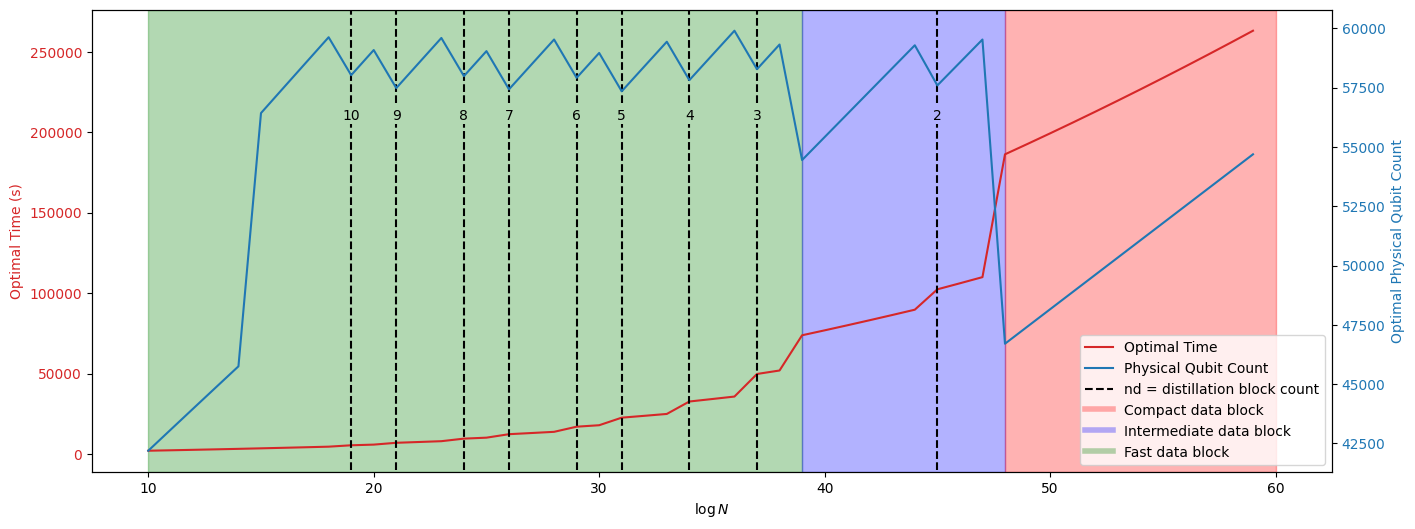

In [6]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from surface_code_opt import *


def plot_optimal_settings():
    """计算并绘制 HHL 的最佳 distillation block count 和物理比特数，并标注数据块颜色。"""
    # 设定参数
    physical_error_rate = 1e-5
    clock_cycle_time = 1e-8
    max_physical_qubits = 60000
    kappa, epsilon, precision = 10, 0.01, 5

    # 存储计算结果
    opt_dist_block_counts, opt_data_protos, opt_time, opt_physical_qubit_count = (
        [],
        [],
        [],
        [],
    )

    # 计算每个 n 的最佳设置
    for n in range(10, 60):
        hhl_task = HHL(n, n, kappa, epsilon, precision)
        opt_values = find_optimal_setting(
            hhl_task.t_gate_count,
            hhl_task.logical_qubit_count,
            physical_error_rate,
            max_physical_qubits,
        )
        opt_dist_block_counts.append(opt_values[0])
        opt_data_protos.append(opt_values[1])
        opt_time.append(opt_values[2] * clock_cycle_time)
        opt_physical_qubit_count.append(opt_values[3])

    # 创建绘图
    fig, ax1 = plt.subplots(figsize=(16, 6))

    # 左 y 轴：最优时间
    ax1.set_xlabel(r"$\log{N}$")
    ax1.set_ylabel("Optimal Time (s)", color="tab:red")
    (line_time,) = ax1.plot(
        range(10, 60), opt_time, color="tab:red", label="Optimal Time"
    )  # 记录折线
    ax1.tick_params(axis="y", labelcolor="tab:red")

    # 右 y 轴：最优物理比特数
    ax2 = ax1.twinx()
    ax2.set_ylabel("Optimal Physical Qubit Count", color="tab:blue")
    (line_qubits,) = ax2.plot(
        range(10, 60),
        opt_physical_qubit_count,
        color="tab:blue",
        label="Physical Qubit Count",
    )  # 记录折线
    ax2.tick_params(axis="y", labelcolor="tab:blue")

    # 计算文本 y 位置
    text_y_position = max(opt_time) * 0.8

    # 1️⃣ **绘制 Data Block Color (数据块颜色)**
    data_protocol_colors = ["red", "blue", "green", "purple", "orange"]  # 颜色列表
    current_protocol = opt_data_protos[0]
    start_index = 0

    for i in range(1, len(opt_data_protos)):
        if opt_data_protos[i] != current_protocol:
            ax1.axvspan(
                start_index + 10,
                i + 10,
                color=data_protocol_colors[data_protocals.index(current_protocol)],
                alpha=0.3,
            )
            current_protocol = opt_data_protos[i]
            start_index = i

    # 最后一个数据块颜色
    ax1.axvspan(
        start_index + 10,
        60,
        color=data_protocol_colors[data_protocals.index(current_protocol)],
        alpha=0.3,
    )

    # 2️⃣ **绘制 distillation block count 变化的竖线（改为黑色）**
    for i in range(1, len(opt_dist_block_counts)):
        if opt_dist_block_counts[i] != opt_dist_block_counts[i - 1]:
            x_pos = i + 10
            ax1.add_line(
                Line2D([x_pos, x_pos], [-10000, 205000], color="black", linestyle="--")
            )
            ax1.add_line(
                Line2D(
                    [x_pos, x_pos], [218000, 10000000], color="black", linestyle="--"
                )
            )

            # 添加文本标注
            ax1.text(
                x_pos,
                text_y_position,
                f"{opt_dist_block_counts[i]}",
                color="black",
                verticalalignment="center",
                horizontalalignment="center",
                # bbox=dict(
                #     facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"
                # ),
            )

    # 3️⃣ **添加 Legend**
    # a. Distillation Block Count (黑色虚线)
    nd_legend = Line2D(
        [0], [0], color="black", linestyle="--", label="nd = distillation block count"
    )

    # b. Data Block Colors (数据协议)
    handles = [
        Line2D([0], [0], color=color, lw=4, alpha=0.3)
        for color in data_protocol_colors[
            : len(set(opt_data_protos))
        ]  # 确保颜色匹配协议数量
    ]
    labels = [protocol.name + " data block" for protocol in data_protocals]

    # c. 添加所有 Legend，放置在右下角
    ax1.legend(
        handles=[line_time, line_qubits, nd_legend] + handles,
        labels=["Optimal Time", "Physical Qubit Count", "nd = distillation block count"]
        + labels,
        loc="lower right",
        frameon=True,
        # title="Distillation block count & data block color",
    )

    # 保存和显示图像
    plt.savefig("data_plot.pdf")
    plt.show()


# 运行绘图函数
plot_optimal_settings()